In [28]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['target'] = boston.target

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(boston.data, boston.target, test_size=0.25)

In [5]:
class DecisionTree:
    def __init__(self, max_depth=-1):  # initally unbounded
        self.max_depth = max_depth
        self.root = None
    
    class Node:
        def __init__(self, (feature, threshold), mean=0):
            self.feature = feature
            self.threshold = threshold
            self.mean = mean
            self.left, self.right = None, None
            
    def fit(self, X, y):
        self.root = self.rec_fit(X, y, 0)

    def rec_fit(self, X, y, depth):
        if(depth != self.max_depth and y.var() != 0):
            f_len = len(X[0])  # features num
            x_len = len(y)     # objects num
            
            best_pair = (0, 0)
            best_var = np.inf
            
            for k in range(f_len):
                for t in X[:, k]:
                    _, y_left, _, y_right = self.split(X, (k, t), y)
                    left_len, right_len = len(y_left), len(y_right)
                    var = float(left_len) / x_len * y_left.var() + float(right_len) / x_len * y_right.var()
                    if(var < best_var):
                        best_pair = (k, t)
                        best_var = var     
            
            node = self.Node(best_pair, y.mean())
            if(left_len and right_len):
                X_left, y_left, X_right, y_right = self.split(X, best_pair, y)
                node.left  = self.rec_fit(X_left, y_left, depth+1)
                node.right = self.rec_fit(X_right, y_right, depth+1)
            return node
        
    def predict(self, X):
        return self.rec_predict(X, self.root)
    
    def rec_predict(self, X, node):
        if(node.left and node.right):
            X_left, ix_left, X_right, ix_right = self.split(X, (node.feature, node.threshold), np.arange(len(X)))
            y_left, y_right = self.rec_predict(X_left, node.left), self.rec_predict(X_right, node.right)
            y = np.zeros(len(X))
            y[ix_left] = y_left
            y[ix_right] = y_right
            return y
        else:
            return node.mean
                
    def split(self, X, (k, t), y):
        left, right = X[:, k] < t, X[:, k] >= t
        return X[left], y[left], X[right], y[right]

In [30]:
my3_res, sk3_res = [], []
grid = np.arange(5, 15)
for k in grid:
    tree = DecisionTree(k)
    tree.fit(X_train, y_train)
    my3_res.append(mean_squared_error(tree.predict(X_test), y_test))
    sk3 = DecisionTreeRegressor(max_depth=k)
    sk3.fit(X_train, y_train)
    sk3_res.append(mean_squared_error(sk3.predict(X_test), y_test))

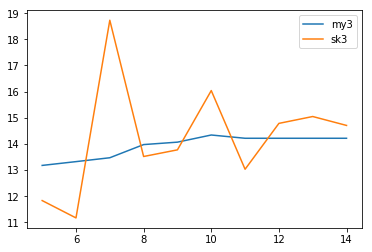

In [31]:
plt.plot(grid, my3_res, label='my3')
plt.plot(grid, sk3_res, label='sk3')
plt.legend(loc='best')
plt.show()

Как видно из графика, построенное дерево сравнимо с тем же из sklearn.